In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as t
import numpy as np
from tqdm import tqdm

In [51]:
column0 = 'IID'
column1 = 'income'
column2 = 'income_lic'
column3 = 'employee_num'
column4 = 'taxes'
column5 = 'inc_per_one'
df = pd.read_csv('fns_for_model.csv', delimiter=';')
    
df[column4] = df["taxesProfit"] + df["taxesVAT"] + df["taxesEmplSal"]
df[column5] = df[column1] / df[column3]

In [52]:
def one_quarter(column, year, quarter):
    
    df1 = df[(df['year'] == year) & (df['quarter'] == quarter)] 
    sum = df1[column].sum()

    df2 = df1.sort_values(by=column, ascending=False)
    df_A = pd.DataFrame()
    df_B = pd.DataFrame()
    df_C = pd.DataFrame()
    
    i1 = 1
    while (df2[column][0:i1].sum() <= 0.8 * sum):
        i1 += 1
    df_A = pd.concat([df_A, df2.iloc[:i1]])

    i2 = i1 + 1
    while (df2[column][i1:i2].sum() <= 0.15 * sum):
        if i2 == i1 + 1:
            df_B = pd.concat([df_B, df2.iloc[:0]])
        i2 += 1
    df_B = pd.concat([df_B, df2.iloc[i1:i2]])

    i3 = i2 + 1
    while (df2[column][i3:i3 + 1].sum() != 0):
        if i3 == i2 + 1:
            df_C = pd.concat([df_C, df2.iloc[:0]])  
        i3 += 1
    df_C = pd.concat([df_C, df2.iloc[i2:i3]])
    
    print("A: " + str(df_A[column0].size))
    print("B: " + str(df_B[column0].size))
    print("C: " + str(df_C[column0].size))
    print("D: " + str(df2[column0].size - df_C[column0].size - df_B[column0].size - df_A[column0].size))
    
    return df2, df_A, df_B, df_C
        

In [53]:
def quarters(column, year, quarter_begin, quarter_end):
    
    df1 = df[(df['quarter'] >= quarter_begin) & (df['quarter'] <= quarter_end) & (df['year'] == year)]
    previous = -1
    df_helper = pd.DataFrame()
    for i in tqdm(df1[column0]):
        if previous == i:
            continue
        df_dummy = df1[(df1[column0] == i)]
        quarter_sum = df_dummy[column].sum()
        df_dummy = df_dummy.drop_duplicates(subset=[column0], keep='first')
        df_dummy.loc[(df[column0] == i), column] = quarter_sum
        df_helper = pd.concat([df_helper, df_dummy])
        previous = i
    df1 = df_helper
    sum = df1[column].sum()
    df2 = df1.sort_values(by=column, ascending=False)
    df_A = pd.DataFrame()
    df_B = pd.DataFrame()
    df_C = pd.DataFrame()
    
    i1 = 1
    while (df2[column][0:i1].sum() <= 0.8 * sum):
        i1 += 1
    df_A = pd.concat([df_A, df2.iloc[:i1]])
    print("A: " + str(df_A[column0].size))

    i2 = i1 + 1
    while (df2[column][i1:i2].sum() <= 0.15 * sum):
        if i2 == i1 + 1:
            df_B = pd.concat([df_B, df2.iloc[:0]])
        i2 += 1
    df_B = pd.concat([df_B, df2.iloc[i1:i2]])
    print("B: " + str(df_B[column0].size))

    i3 = i2 + 1
    while (df2[column][i3:i3 + 1].sum() != 0):
        if i3 == i2 + 1:
            df_C = pd.concat([df_C, df2.iloc[:0]])  
        i3 += 1
    df_C = pd.concat([df_C, df2.iloc[i2:i3]])
    print("C: " + str(df_C[column0].size))
    
    return df2, df_A, df_B, df_C

In [54]:
#begin = 1
#end = 4
#year = 2019
#df_taxes, df_taxes_A, df_taxes_B, df_taxes_C = quarters(column=column4, year=year, quarter_begin=begin, quarter_end=end)

In [55]:
year = 2020
quarter = 3
df_income, df_income_A, df_income_B, df_income_C = one_quarter(column=column1, year=year, quarter=quarter)
df_income_liс, df_income_liс_A, df_income_liс_B, df_income_liс_C = one_quarter(column=column2, year=year, quarter=quarter)
df_employee, df_employee_A, df_employee_B, df_employee_C = one_quarter(column=column3, year=year, quarter=quarter)
df_taxes, df_taxes_A, df_taxes_B, df_taxes_C = one_quarter(column=column4, year=year, quarter=quarter)
#one_quarter(column=column5, year=year, quarter=quarter)

A: 1853
B: 6061
C: 23452
D: 4524
A: 193
B: 315
C: 1312
D: 34070
A: 3807
B: 7980
C: 20652
D: 3451
A: 1315
B: 4412
C: 29517
D: 646


In [56]:
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)
    
format_number = t.FuncFormatter(format_number)

In [57]:
def plot_normal(df_param, df_param_A, df_param_B, df_param_C, column, phrase, divider):
    x = [i for i in range(0, df_param[column0].size)]
    y = []
    sum = 0
    for i in df_param[column0]:
        if i != 0:
            sum += df_param.loc[(df_param[column0] == i), column].item() / divider
        y.append(sum)
    
    figure, ax = plt.subplots()
    ax.set_ylabel(phrase, rotation='horizontal')
    ax.set_xlabel('N')
    ax.yaxis.set_label_coords(0.03, 1.03)
    ax.xaxis.set_label_coords(1.04, -0.06)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.plot(x, y, color='blue', markersize=3.)
    A = df_param_A[column0].size
    B = df_param_B[column0].size + A
    C = df_param_C[column0].size + B
    plt.vlines(x = A, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
    plt.vlines(x = B, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
    plt.vlines(x = C, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = A, y = y[A], color='#b40000', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = B, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
    plt.grid()
    plt.xlim(xmin=0)
    plt.ylim(ymin=0)
    plt.show()

    return figure

In [58]:
def plot_log(df_param, df_param_A, df_param_B, df_param_C, column, phrase, divider):
    x = [i for i in range(0, df_param[column0].size)]
    y = []
    sum = 0
    for i in df_param[column0]:
        if i != 0:
            sum += df_param.loc[(df_param[column0] == i), column].item() / divider
        y.append(sum)
    
    figure, ax = plt.subplots()
    ax.set_ylabel(phrase, rotation='horizontal')
    ax.set_xlabel('N')
    ax.yaxis.set_label_coords(0.03, 1.03)
    ax.xaxis.set_label_coords(1.01, -0.04)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xscale('log', base = 10)
    ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
    ax.xaxis.set_major_formatter(format_number)
    ax.plot(x, y, color='blue', markersize=3.)
    A = df_param_A[column0].size
    B = df_param_B[column0].size + A
    C = df_param_C[column0].size + B
    plt.vlines(x = A, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
    plt.vlines(x = B, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
    plt.vlines(x = C, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = A, y = y[A], color='#b40000', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = B, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = C, y = y[C], color='#007800', linestyles='--', linewidth=1)
    plt.grid()
    plt.xlim(xmin=1)
    plt.ylim(ymin=0)
    plt.show()

    return figure

INCOME


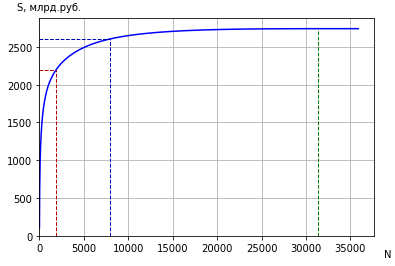

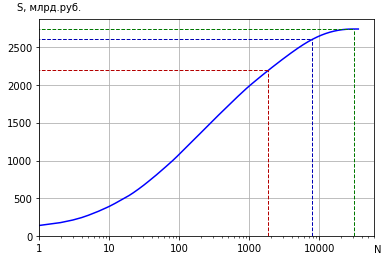

In [59]:
print("INCOME")
figure = plot_normal(df_income, df_income_A, df_income_B, df_income_C, column1, phrase='S, млрд.руб.', divider=1e9)
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2020Q3.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2020Q3.eps', format='eps', transparent=True)
figure = plot_log(df_income, df_income_A, df_income_B, df_income_C, column1, phrase='S, млрд.руб.', divider=1e9)
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2020Q3-log.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2020Q3-log.eps', format='eps', transparent=True)

#print("INCOME_LIC")
#figure = plot_normal(df_income_liс, df_income_liс_A, df_income_liс_B, df_income_liс_C, column2, phrase='S, млрд.руб.', divider=1e9)
#figure.savefig('./ABC(no average salary)/AS1-ABC-Income_lic-2021Q3.png', format='png')
#figure.savefig('./ABC(no average salary)/AS1-ABC-Income_lic-2021Q3.eps', format='eps')
#figure = plot_log(df_income_liс, df_income_liс_A, df_income_liс_B, df_income_liс_C, column2, phrase='S, млрд.руб.', divider=1e9)
#figure.savefig('./ABC(no average salary)/AS1-ABC-Income_lic-2021Q3-log2.png', format='png')
#figure.savefig('./ABC(no average salary)/AS1-ABC-Income_lic-2021Q3-log2.eps', format='eps')

#print("EMPLOYEE_NUM")
#figure = plot_normal(df_employee, df_employee_A, df_employee_B, df_employee_C, column3, phrase='S, тыс.', divider=1e3)
#figure.savefig('./ABC(no average salary)/AS1-ABC-Employee_num-2021Q3.png', format='png')
#figure.savefig('./ABC(no average salary)/AS1-ABC-Employee_num-2021Q3.eps', format='eps')
#figure = plot_log(df_employee, df_employee_A, df_employee_B, df_employee_C, column3, phrase='S, тыс.', divider=1e3)
#figure.savefig('./ABC(no average salary)/AS1-ABC-Employee_num-2021Q3-log2.png', format='png')
#figure.savefig('./ABC(no average salary)/AS1-ABC-Employee_num-2021Q3-log2.eps', format='eps')

#print("TAXES")
#figure = plot_normal(df_taxes, df_taxes_A, df_taxes_B, df_taxes_C, column4, phrase='S, млрд.руб.', divider=1e9)
#figure.savefig('./ABC(no average salary)/AS1-ABC-Taxes-2019.png', format='png')
#figure.savefig('./ABC(no average salary)/AS1-ABC-Taxes-2019.eps', format='eps')
#figure = plot_log(df_taxes, df_taxes_A, df_taxes_B, df_taxes_C, column4, phrase='S, млрд.руб.', divider=1e9)
#figure.savefig('./ABC(no average salary)/AS1-ABC-Taxes-2019-log2.png', format='png')
#figure.savefig('./ABC(no average salary)/AS1-ABC-Taxes-2019-log2.eps', format='eps')

#print(df_taxes[column0].size - df_taxes_A[column0].size - df_taxes_B[column0].size - df_taxes_C[column0].size)

In [60]:
def magic_square(x, y, df_qua, df, df_A, df_B, df_C, x_label, y_label):
    df_D = pd.DataFrame()
    df_D = pd.concat([df_D, df.iloc[(df_A[column0].size + df_B[column0].size + df_C[column0].size):df[column0].size]])
    colors = []
    
    """
    y_A = list(df_A[y])
    for i in range(len(y_A)):
        colors.append('#b40000')
        
    y_B = list(df_B[y])
    for i in range(len(y_B)):
        colors.append('#0000b4')
        
    y_C = list(df_C[y])
    for i in range(len(y_C)):
        colors.append('#007800')
        
    y_D = list(df_D[y])
    for i in range(len(y_D)):
        colors.append('black')
    """
    
    x1 = list(df_qua[x])
    y1 = list(df_qua[y])
    j = 0
    for i in tqdm(df_qua[column0]):
        y1[j] /= 1e6
        if x_label == y_label:
            x1[j] /= 1e6
        j += 1
        if df_A[df_A[column0] == i].size > 0:
            colors.append('#b40000')
            continue
        if df_B[df_B[column0] == i].size > 0:
            colors.append('#0000b4')
            continue
        if df_C[df_C[column0] == i].size > 0:
            colors.append('#007800')
            continue
        if df_D[df_D[column0] == i].size > 0:
            colors.append('black')
            continue
        
    figure, ax = plt.subplots()
    ax.set_ylabel(y_label, rotation='horizontal')
    ax.set_xlabel(x_label)
    ax.set_xscale('log', base = 10)
    ax.set_yscale('log', base = 10)
    ax.yaxis.set_label_coords(0.03, 1.02)
    ax.xaxis.set_label_coords(1.01, -0.04)
    if x_label == y_label:
        ax.set_xticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 1000000])
        ax.xaxis.set_label_coords(1.07, -0.05)
    ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 1000000])
    ax.yaxis.set_major_formatter(format_number)
    ax.xaxis.set_major_formatter(format_number)
    ax.scatter(x1, y1, s=0.5, c=colors)
    plt.ylim(ymin=1)
    plt.grid()
    plt.show()
    
    return figure

INCOME/EMPLOYEE_NUM (TAXES)


100%|██████████| 35890/35890 [00:26<00:00, 1357.66it/s]


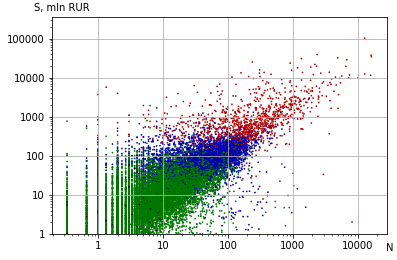

In [61]:
print("INCOME/EMPLOYEE_NUM (TAXES)")
df_qua = df[(df['year'] == year) & (df['quarter'] == quarter)]
figure = magic_square(column3, column1, df_qua, df_taxes, df_taxes_A, df_taxes_B, df_taxes_C, x_label='N', y_label='S, mln RUR')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2020Q3-log.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2020Q3-log.eps', format='eps', transparent=True)

#print("INCOME_LIC/EMPLOYEE_NUM (TAXES)")
#figure = magic_square(column3, column2, df_taxes, df_taxes_A, df_taxes_B, df_taxes_C, x_label='N', y_label='S, млн.руб.')
#figure.savefig('./ABC(MQ)/QUA-Income_lic-Staff-fromTaxes-2021Q3-log2.png', format='png')
#figure.savefig('./ABC(MQ)/QUA-Income_lic-Staff-fromTaxes-2021Q3-log2.eps', format='eps')

#print("TAXES/EMPLOYEE_NUM (INCOME)")
#figure = magic_square(column3, column4, df_income, df_income_A, df_income_B, df_income_C, x_label='N', y_label='S, млн.руб.')
#figure.savefig('./ABC(MQ)/QUA-Taxes-Staff-fromIncome-2021Q3-log2.png', format='png')
#figure.savefig('./ABC(MQ)/QUA-Taxes-Staff-fromIncome-2021Q3-log2.eps', format='eps')

#print("INCOME/TAXES (EMPLOYEE_NUM)")
#figure = magic_square(column4, column1, df_employee, df_employee_A, df_employee_B, df_employee_C, x_label='S, млн.руб.', y_label='S, млн.руб.')
#figure.savefig('./ABC(MQ)/QUA-Income-Taxes-fromStaff-2021Q3-log2.png', format='png')
#figure.savefig('./ABC(MQ)/QUA-Income-Taxes-fromStaff-2021Q3-log2.eps', format='eps')

# Не строить по горизонтали Income

In [62]:
def magic_square(x, y, df, x_label, y_label):
    df_ac = df[df['isIT'] == 1]
    df_not_ac = df[df['isIT'] == 0]
    colors = []
    
    print("ac: " + str(len(list(df_ac[y]))))
    print("not ac: " + str(len(list(df_not_ac[y]))))
    
    x1 = list(df[x])
    y1 = list(df[y])
    j = 0
    for i in tqdm(df[column0]):
        y1[j] /= 1e6
        if df.loc[df[column0] == i, 'isIT'].item() == 1:
            colors.append('#EF3434')
        if df.loc[df[column0] == i, 'isIT'].item() == 0:
            colors.append('#22175C')
        if x_label == y_label:
            x1[j] /= 1e6
        j += 1
        
    figure, ax = plt.subplots()
    ax.set_ylabel(y_label, rotation='horizontal')
    ax.set_xlabel(x_label)
    ax.set_xscale('log', base = 10)
    ax.set_yscale('log', base = 10)
    ax.yaxis.set_label_coords(0.03, 1.02)
    ax.xaxis.set_label_coords(1.01, -0.04)
    if x_label == y_label:
        ax.set_xticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 1000000])
        ax.xaxis.set_label_coords(1.07, -0.05)
    ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 1000000])
    ax.yaxis.set_major_formatter(format_number)
    ax.xaxis.set_major_formatter(format_number)
    ax.scatter(x1, y1, s=0.5, c=colors)
    plt.ylim(ymin=1)
    plt.grid()
    plt.show()
    
    return figure

INCOME/EMPLOYEE_NUM (ACC)
ac: 11067
not ac: 24823


100%|██████████| 35890/35890 [00:15<00:00, 2361.23it/s]


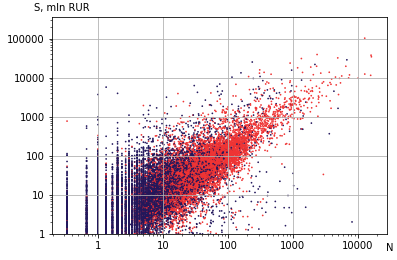

In [63]:
print("INCOME/EMPLOYEE_NUM (ACC)")
df_acc = df[(df['year'] == year) & (df['quarter'] == quarter)] 
figure = magic_square(column3, column1, df_acc, x_label='N', y_label='S, mln RUR')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-acc-2020Q3-log.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-acc-2020Q3-log.eps', format='eps', transparent=True)

In [64]:
df_first_year = df[(df['year'] == 2019) & (df['quarter'] == 1)]
df_last_year = df[(df['year'] == 2021) & (df['quarter'] == 3)]
df_DD = pd.merge(df_first_year, df_last_year, how='inner', on=[column0])

# Всегда аккредитована
df_only_acc = df_DD[(df_DD['isIT_x'] == 1) & (df_DD['isIT_y'] == 1)]
# Всегда неаккредитована
df_only_not_acc = df_DD[(df_DD['isIT_x'] == 0) & (df_DD['isIT_y'] == 0)]
# Была неаккредитована и стала аккредитованной
df_is_acc = df_DD[(df_DD['isIT_x'] == 0) & (df_DD['isIT_y'] == 1)]
# Была аккредитована и стала неаккредитованной
df_was_acc = df_DD[(df_DD['isIT_x'] == 1) & (df_DD['isIT_y'] == 0)]
print(df_only_acc[column0].size)
print(df_only_not_acc[column0].size)
print(df_is_acc[column0].size)
print(df_was_acc[column0].size)
def mean_value(column):
    mean_isIT_before = df_only_acc[column + '_x'].mean()
    mean_isIT_after = df_only_acc[column + '_y'].mean()
    mean_isnotIT_before = df_only_not_acc[column + '_x'].mean()
    mean_isnotIT_after = df_only_not_acc[column + '_y'].mean()
    return mean_isIT_before, mean_isIT_after, mean_isnotIT_before, mean_isnotIT_after

is_before, is_after, not_before, not_after = mean_value(column1)
print('INCOME')
print(is_before)
print(is_after)
print(not_before)
print(not_after)
did = is_after - is_before - not_after + not_before
print(did)

is_before, is_after, not_before, not_after = mean_value(column2)
print('INCOME_LIC')
print(is_before)
print(is_after)
print(not_before)
print(not_after)
did = is_after - is_before - not_after + not_before
print(did)

is_before, is_after, not_before, not_after = mean_value(column3)
print('STAFF')
print(is_before)
print(is_after)
print(not_before)
print(not_after)
did = is_after - is_before - not_after + not_before
print(did)

is_before, is_after, not_before, not_after = mean_value(column4)
print('TAXES')
print(is_before)
print(is_after)
print(not_before)
print(not_after)
did = is_after - is_before - not_after + not_before
print(did)

8876
16485
10
1
INCOME
49163006.866719246
281207941.7007661
9060855.180103123
37968151.157719135
203137638.85643083
INCOME_LIC
6811856.388012619
12574438.586412799
438703.97761601454
256629.2712162572
5944656.904799937
STAFF
60.18116268589455
124.49411333934208
10.293114952987564
14.735615711252654
59.87044989518244
TAXES
8554305.208427219
33292228.553740423
1686244.2215953898
4397248.188110404
22026919.378798194


In [77]:
def diff_in_diff(column):
    
    df_helper = df_DD
    
    df_before = df_DD.filter([column + '_x', 'isIT_x', 'isIT_y'])
    df_before['t'] = 0
    df_before['g'] = df_before['isIT_x']
    df_before['param'] = df_before[column + '_x']
    
    df_after = df_DD.filter([column + '_y', 'isIT_x', 'isIT_y'])
    df_after['t'] = 1
    df_after['g'] = df_after['isIT_y']
    df_after['param'] = df_after[column + '_y']
    
    df_reg = pd.concat([df_before, df_after])
    df_reg['gt'] = df_reg.g * df_reg.t
    
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()

    X = df_reg[['g', 't', 'gt']]
    y = df_reg.param

    lr.fit(X, y)
    return lr.coef_, lr.intercept_

In [78]:
coef_income, bias_income = diff_in_diff(column1)
print(coef_income, bias_income)
coef_income_lic, bias_income_lic = diff_in_diff(column2)
print(coef_income_lic, bias_income_lic)
coef_staff, bias_staff = diff_in_diff(column3)
print(coef_staff, bias_staff)
coef_taxes, bias_taxes = diff_in_diff(column4)
print(coef_taxes,bias_taxes)

[4.00981697e+07 2.89062394e+07 2.02898127e+08] 9059608.694692202
[6372651.0120032  -181824.3111036  5933745.89581513] 438438.0158224483
[49.88017287  4.44053174 59.77503363] 10.294210366774042
[ 6867425.85071453  2710749.3750042  22002298.74991244] 1686236.8129124455
